Data Loaded and Scaled: (45211, 17)
Explained variance ratio: [0.14197539 0.10236813]
Cumulative variance: 0.24


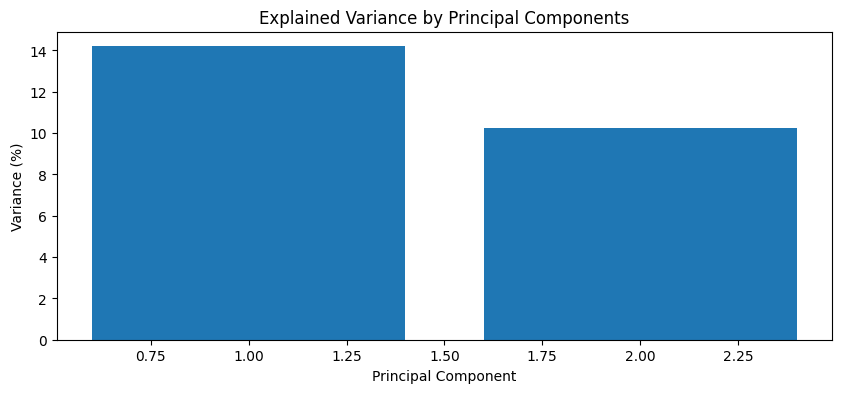

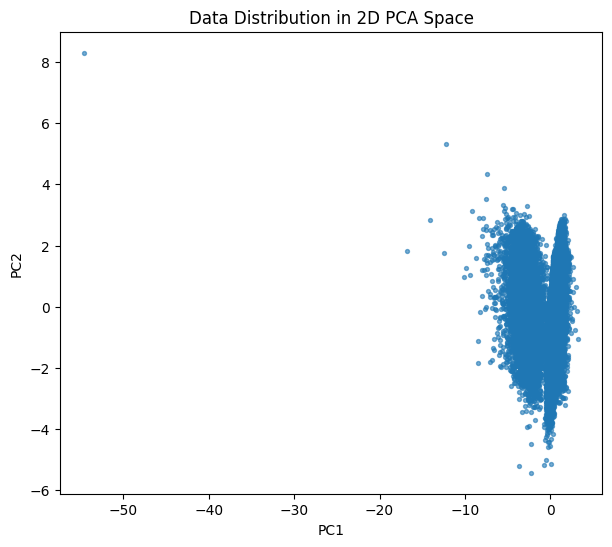

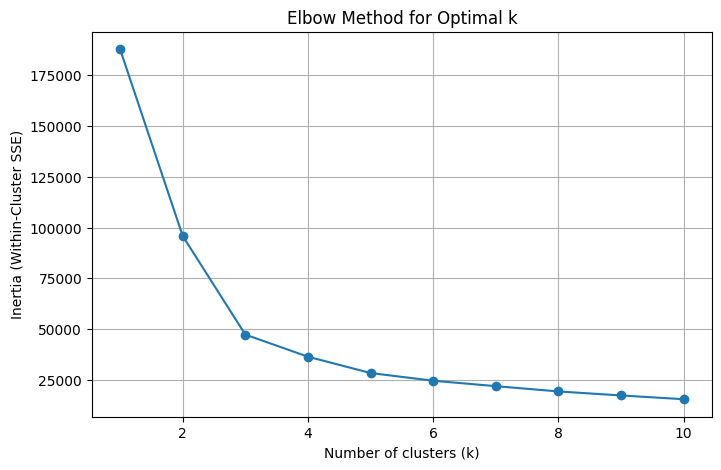

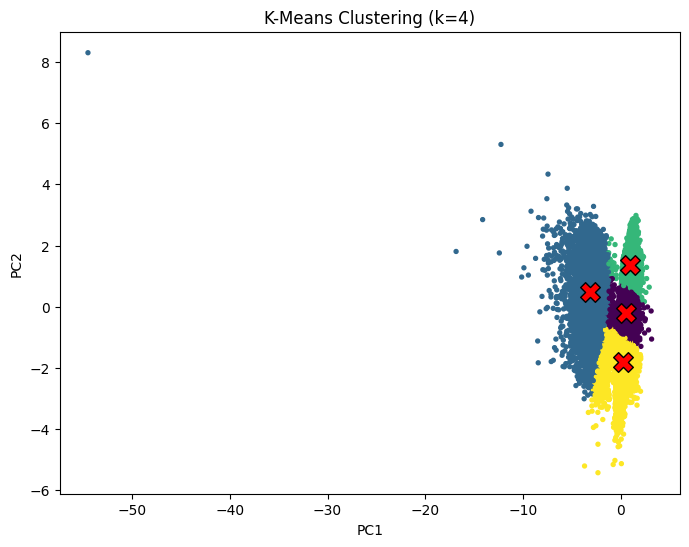

Cluster sizes:
 0    14539
2    13177
3    10100
1     7395
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.style.use('seaborn-v0_8')
%matplotlib inline

def load_data(filepath):
    """Load and preprocess the bank marketing dataset"""
    df = pd.read_csv(filepath, sep=';')

    # Encode categorical columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    # Scale the features
    X = df.values
    X_scaled = StandardScaler().fit_transform(X)

    print("Data Loaded and Scaled:", X_scaled.shape)
    return X_scaled, df

def apply_pca(x, n_components=2):
    """Apply PCA for dimensionality reduction and visualize"""
    pca = PCA(n_components=n_components, random_state=42)
    x_pca = pca.fit_transform(x)

    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative variance: {np.sum(pca.explained_variance_ratio_):.2f}")

    # Plot variance explained
    plt.figure(figsize=(10,4))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_*100)
    plt.title("Explained Variance by Principal Components")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance (%)")
    plt.show()

    # Scatter plot in 2D
    plt.figure(figsize=(7,6))
    plt.scatter(x_pca[:,0], x_pca[:,1], s=8, alpha=0.6)
    plt.title("Data Distribution in 2D PCA Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    return x_pca


def find_optimal_clusters(x, max_clusters=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_clusters+1), inertias, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia (Within-Cluster SSE)")
    plt.grid(True)
    plt.show()

    return inertias


def perform_kmeans_clustering(x, n_clusters=4):
    """Run KMeans clustering and visualize"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)

    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=8)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                color='red', marker='X', s=200, edgecolor='k')
    plt.title(f"K-Means Clustering (k={n_clusters})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    print("Cluster sizes:\n", pd.Series(labels).value_counts())
    return labels


def perform_agglomerative_clustering(x, n_clusters=4):
    """Run Agglomerative Clustering and visualize"""
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(x)

    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='plasma', s=8)
    plt.title(f"Agglomerative Clustering (k={n_clusters})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    print("Cluster sizes:\n", pd.Series(labels).value_counts())
    return labels


def get_linkages(x):
    """Compute linkage matrix for dendrogram"""
    linked = linkage(x, method='ward')
    return linked


def plot_dendrogram(linked):
    """Plot dendrogram"""
    plt.figure(figsize=(12,6))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title("Dendrogram (Hierarchical Clustering)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


X_scaled, df = load_data('/content/bank-full.csv')
X_pca = apply_pca(X_scaled)
inertias = find_optimal_clusters(X_pca)
labels_kmeans = perform_kmeans_clustering(X_pca, n_clusters=4)
labels_agg = perform_agglomerative_clustering(X_pca, n_clusters=4)
linked = get_linkages(X_pca)
plot_dendrogram(linked)


# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df =df = pd.read_csv(filepath, sep=';') # TODO: Load CSV with correct separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features] # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)



    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [8]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) == 0:
                # reinitialize if empty cluster
                new_centroids[k] = X[np.random.randint(0, X.shape[0])]
            else:
                new_centroids[k] = cluster_points.mean(axis=0)
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            # check convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids
            self.labels = labels

        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

/tmp/ipython-input-4153775747.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=8, cmap='viridis')


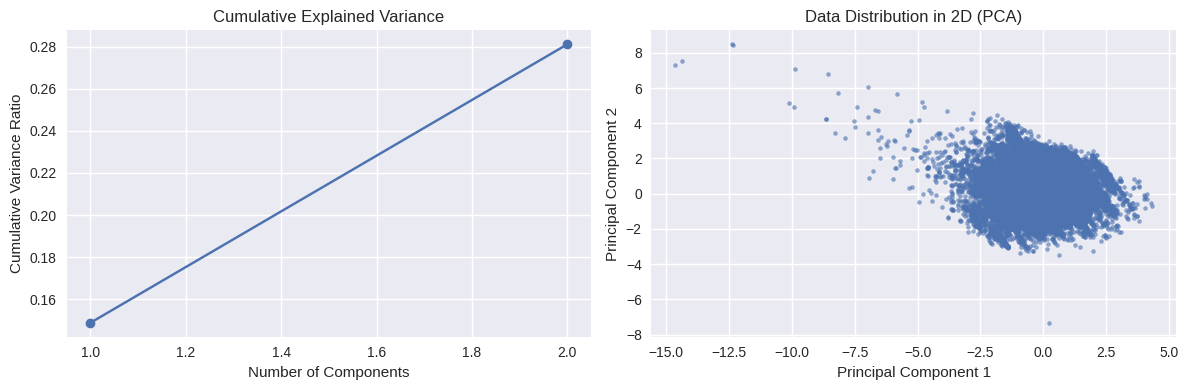

Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    explained_var = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)

    plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance Ratio")
    plt.grid(True)

    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=8, cmap='viridis')
    plt.title("Data Distribution in 2D (PCA)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

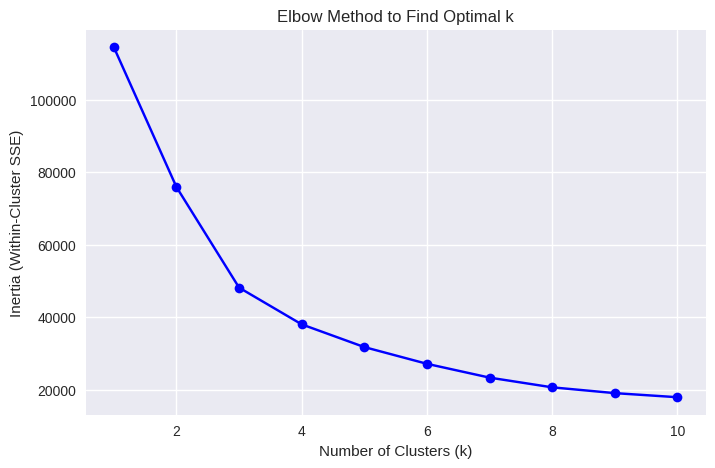

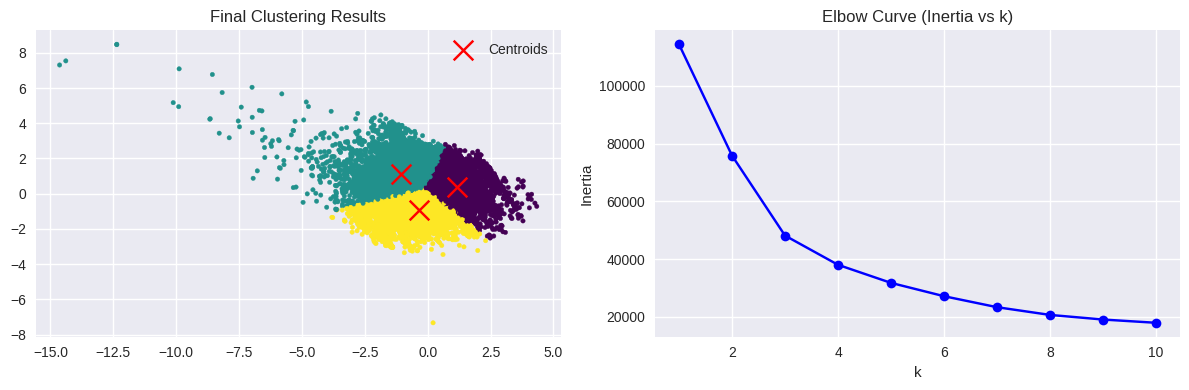


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [ ]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster SSE)')
    plt.title('Elbow Method to Find Optimal k')
    plt.grid(True)
    plt.show()

    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=10)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
plt.plot(range(1, len(inertias) + 1), inertias, 'bo-')
plt.title('Elbow Curve (Inertia vs k)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

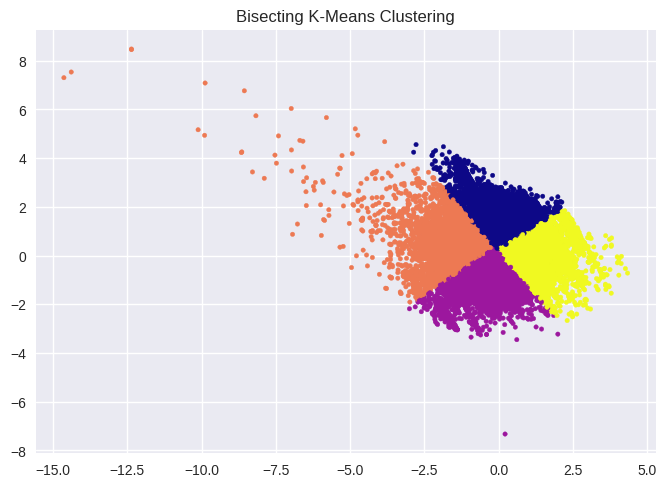

Cluster counts: [ 7639 16348  8429 12795]


In [8]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # --- Your implementation below (no structure changes) ---
        np.random.seed(self.random_state)

        # Start: all points in cluster 0
        labels = np.zeros(X.shape[0], dtype=int)
        current_clusters = {0: np.arange(X.shape[0])}
        next_label = 1  # next new cluster label

        # Compute initial centroid
        self.centers_[0] = X.mean(axis=0)

        # Keep splitting until reaching desired number of clusters
        while len(current_clusters) < self.n_clusters:
            # Select cluster to split: largest by number of points
            cluster_to_split = max(current_clusters.keys(), key=lambda c: len(current_clusters[c]))
            indices = current_clusters[cluster_to_split]
            X_sub = X[indices]

            # Skip if not enough points to split
            if X_sub.shape[0] <= 2:
                break

            # Run binary KMeans on this subset
            km = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = km.fit_predict(X_sub)

            # Assign new labels globally
            left_mask = sub_labels == 0
            right_mask = sub_labels == 1
            labels[indices[left_mask]] = cluster_to_split
            labels[indices[right_mask]] = next_label

            # Record centroids and split mapping
            self.centers_[cluster_to_split] = km.cluster_centers_[0]
            self.centers_[next_label] = km.cluster_centers_[1]
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)

            # Update cluster list
            current_clusters[cluster_to_split] = indices[left_mask]
            current_clusters[next_label] = indices[right_mask]
            next_label += 1

            # Stop if desired number of clusters reached
            if len(current_clusters) >= self.n_clusters:
                break

        # Store labels and centroids
        self.labels_ = labels
        return self.labels_


        # Example usage (as in your boilerplate)
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='plasma', s=10)
plt.title("Bisecting K-Means Clustering")
plt.show()

print("Cluster counts:", np.bincount(labels))



## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

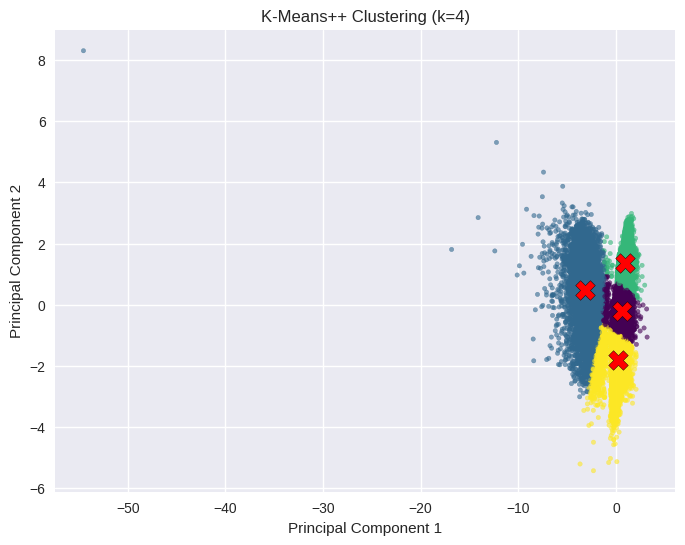

Silhouette Score (K-Means++): 0.467


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def kmeans_plus_plus(x, n_clusters=4):
    """K-Means++ initialization for better clustering stability"""
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(x)

    # Visualization
    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=10, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c='red', s=200, marker='X', edgecolor='k')
    plt.title("K-Means++ Clustering (k=4)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    score = silhouette_score(x, labels)
    print(f"Silhouette Score (K-Means++): {score:.3f}")
    return labels

# Run K-Means++ on PCA data
labels_pp = kmeans_plus_plus(X_pca, n_clusters=4)


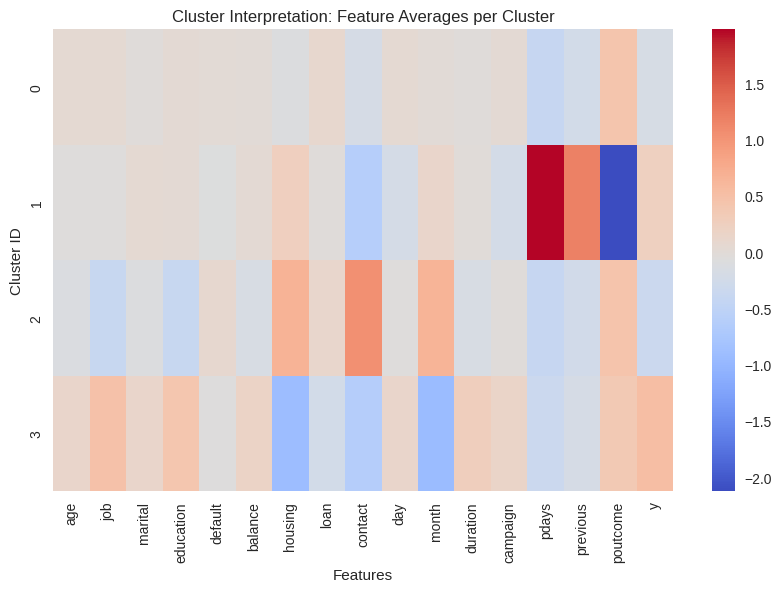

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Cluster,,,,,,,,,,,,,,,,,
0,0.042384,0.043509,-0.036814,0.039490,0.008743,-0.003353,-0.101236,0.088216,-0.196971,0.053219,-0.004097,-0.036366,0.029540,-0.402607,-0.243161,0.429738,-0.174377
1,-0.044346,-0.043822,0.049508,0.032272,-0.079589,0.035589,0.249996,-0.038662,-0.611962,-0.210719,0.128590,-0.011346,-0.224430,1.981603,1.189961,-2.127288,0.239357
2,-0.114839,-0.388167,-0.089600,-0.384158,0.085824,-0.153718,0.676726,0.112277,1.042964,-0.043480,0.651746,-0.167772,-0.032951,-0.409896,-0.250095,0.442289,-0.343204
3,0.121282,0.475877,0.133644,0.420718,-0.066282,0.179318,-0.920205,-0.245162,-0.629101,0.134400,-0.938556,0.279540,0.164790,-0.336560,-0.194944,0.361910,0.523527


In [5]:
# Add cluster labels to original (scaled) dataset
clustered_df = pd.DataFrame(X_scaled, columns=df.columns)
clustered_df['Cluster'] = labels_pp

# Compute cluster-wise means
cluster_summary = clustered_df.groupby('Cluster').mean()

# Show key differences visually
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=False)
plt.title("Cluster Interpretation: Feature Averages per Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster ID")
plt.show()

# Print summary statistics
display(cluster_summary)


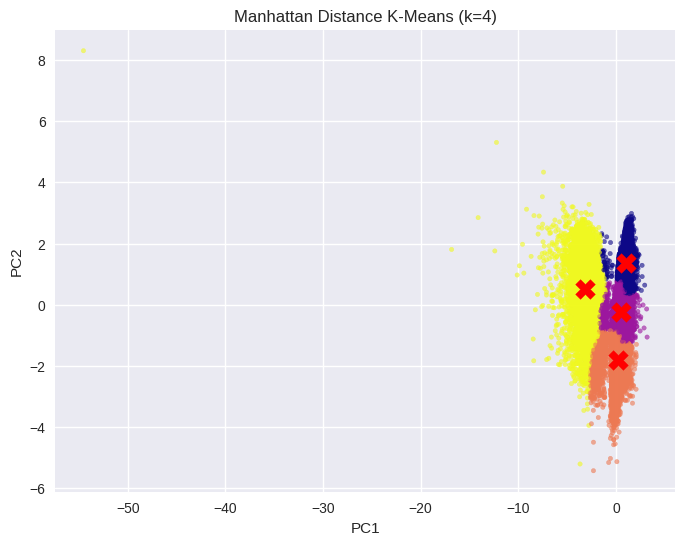

In [6]:
from sklearn.metrics import pairwise_distances_argmin_min

def manhattan_kmeans(x, n_clusters=4, max_iters=100):
    """Custom K-Means using Manhattan distance"""
    np.random.seed(42)
    centroids = x[np.random.choice(range(len(x)), n_clusters, replace=False)]

    for _ in range(max_iters):
        # Assign points to nearest centroid (L1 distance)
        distances = np.abs(x[:, np.newaxis] - centroids).sum(axis=2)
        labels = np.argmin(distances, axis=1)

        # Recalculate centroids
        new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Visualize
    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='plasma', s=10, alpha=0.6)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X')
    plt.title("Manhattan Distance K-Means (k=4)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    return labels

# Run Manhattan-based K-Means
labels_manhattan = manhattan_kmeans(X_pca, n_clusters=4)


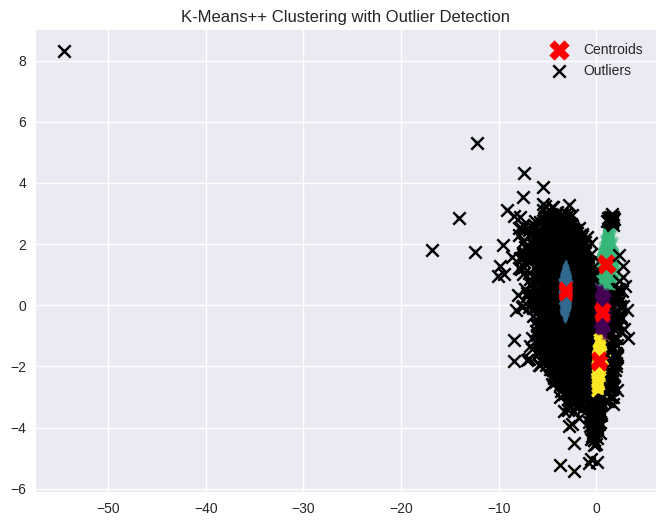

Number of detected outliers: 4021


In [7]:
def detect_outliers(x, labels, centroids, threshold=2.5):
    """Detect points that are far from all centroids"""
    distances = np.linalg.norm(x - centroids[labels], axis=1)
    outlier_mask = distances > (threshold * distances.std())
    outliers = np.where(outlier_mask)[0]

    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=10, alpha=0.5)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
    plt.scatter(x[outliers,0], x[outliers,1], c='black', marker='x', s=80, label='Outliers')
    plt.title("K-Means++ Clustering with Outlier Detection")
    plt.legend()
    plt.show()

    print(f"Number of detected outliers: {len(outliers)}")
    return outliers

# Detect outliers based on K-Means++ result
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42).fit(X_pca)
outliers = detect_outliers(X_pca, labels_pp, kmeans_model.cluster_centers_)


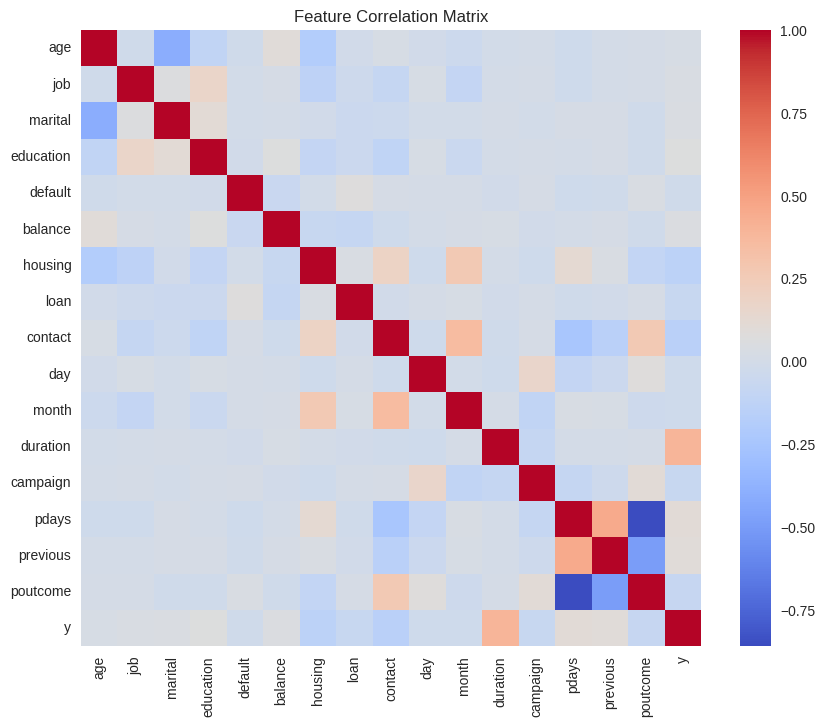

✅ Data Loaded and Scaled: (45211, 17)
Explained variance ratio: [0.14197539 0.10236813]
Cumulative variance: 0.24


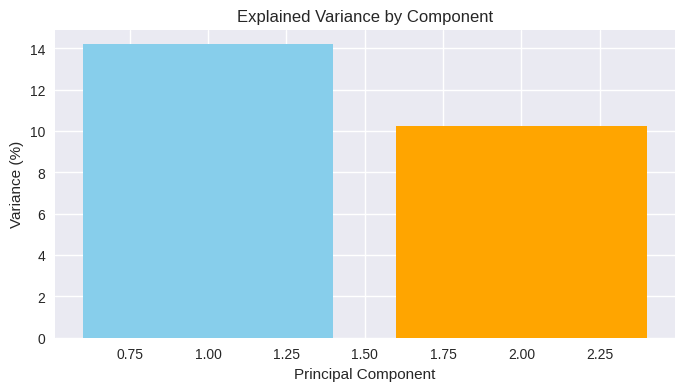

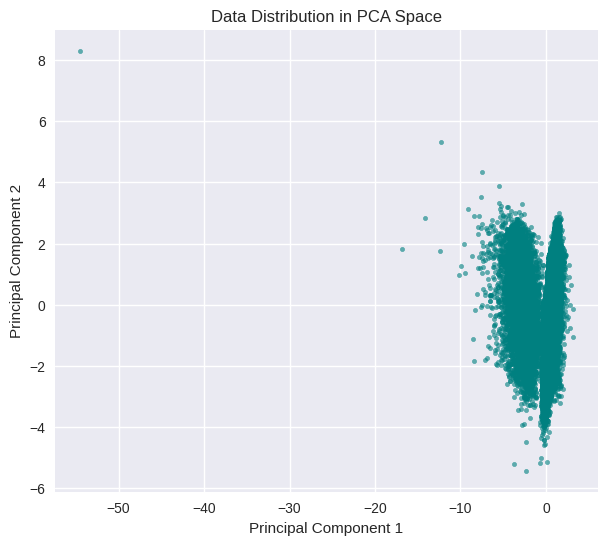

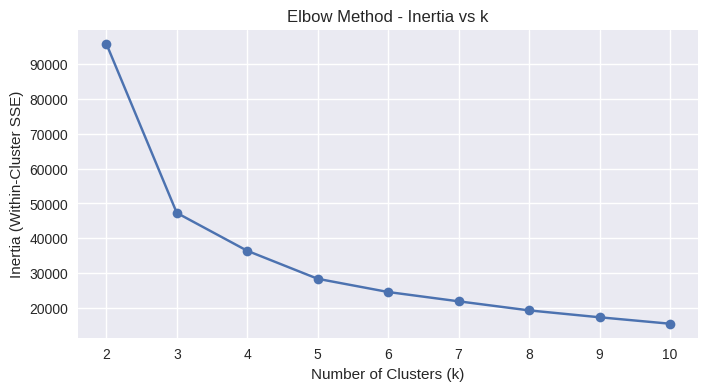

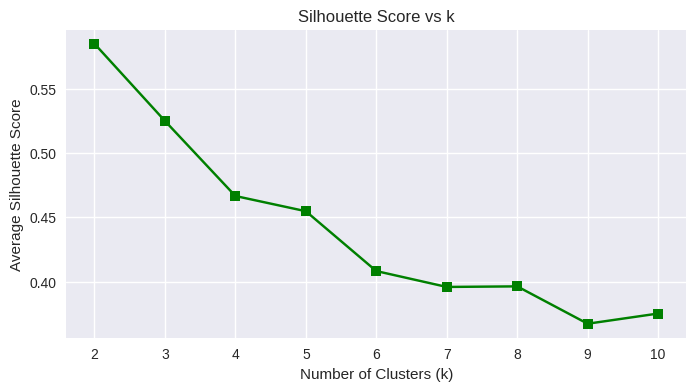

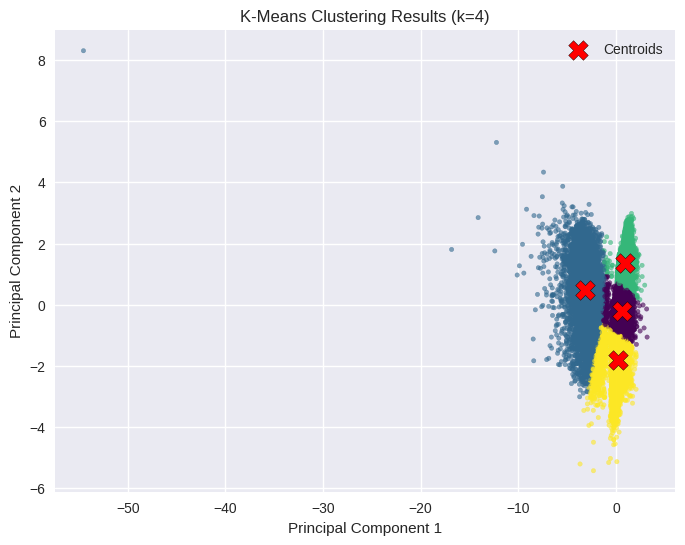

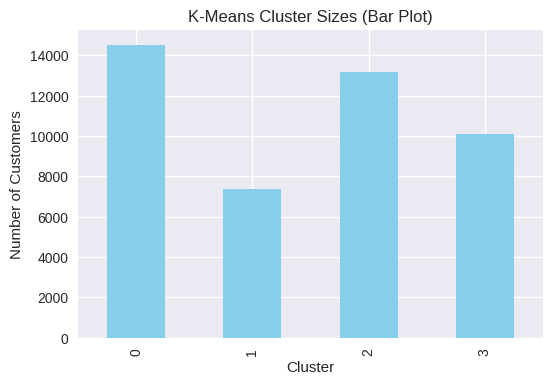

/tmp/ipython-input-1598087920.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Silhouette', data=sil_df, palette='Set2')


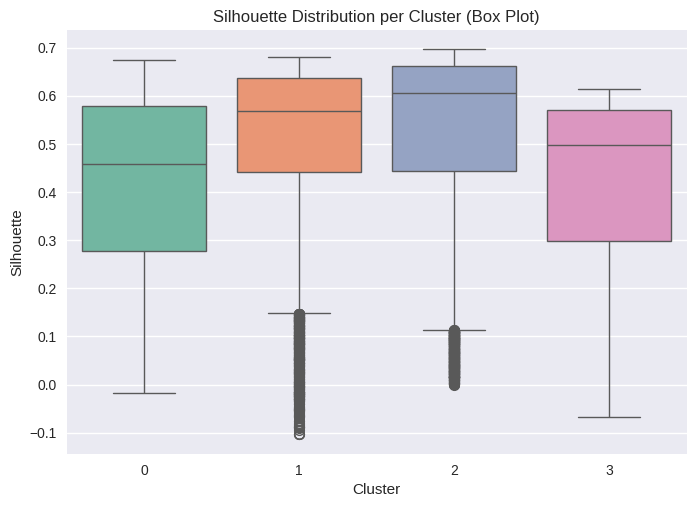

Cluster sizes:
 0    14539
1     7395
2    13177
3    10100
Name: count, dtype: int64
Average Silhouette Score: 0.46655216011211964


In [ ]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

def load_data(filepath):
    """Load and preprocess the bank marketing dataset"""
    df = pd.read_csv(filepath, sep=';')

    # Encode categorical columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    # Scale numerical features
    X = df.values
    X_scaled = StandardScaler().fit_transform(X)

    # --- Screenshot 1: Correlation Matrix ---
    plt.figure(figsize=(10,8))
    sns.heatmap(pd.DataFrame(X_scaled, columns=df.columns).corr(), cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

    print(" Data Loaded and Scaled:", X_scaled.shape)
    return X_scaled, df


def apply_pca(x, n_components=2):
    """Apply PCA for dimensionality reduction and visualize"""
    pca = PCA(n_components=n_components, random_state=42)
    x_pca = pca.fit_transform(x)

    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative variance: {np.sum(pca.explained_variance_ratio_):.2f}")

    # --- Screenshot 2A: Explained Variance ---
    plt.figure(figsize=(8,4))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_*100, color=['skyblue','orange'])
    plt.title("Explained Variance by Component")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance (%)")
    plt.show()

    # --- Screenshot 2B: PCA Scatter ---
    plt.figure(figsize=(7,6))
    plt.scatter(x_pca[:,0], x_pca[:,1], s=10, alpha=0.6, color='teal')
    plt.title("Data Distribution in PCA Space")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    return x_pca


def find_optimal_clusters(x, max_clusters=10):
    """Plot the elbow curve and silhouette score plots"""
    inertias = []
    silhouettes = []

    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(x)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(x, labels))

    # --- Screenshot 3A: Inertia (Elbow Curve) ---
    plt.figure(figsize=(8,4))
    plt.plot(range(2, max_clusters+1), inertias, marker='o')
    plt.title("Elbow Method - Inertia vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Within-Cluster SSE)")
    plt.grid(True)
    plt.show()

    # --- Screenshot 3B: Silhouette Score vs k ---
    plt.figure(figsize=(8,4))
    plt.plot(range(2, max_clusters+1), silhouettes, marker='s', color='green')
    plt.title("Silhouette Score vs k")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Average Silhouette Score")
    plt.grid(True)
    plt.show()

    return inertias, silhouettes


# ==================== 4️K-MEANS CLUSTERING & CLUSTER SIZE PLOTS ====================
def perform_kmeans_clustering(x, n_clusters=4):
    """Run KMeans clustering and visualize"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)

    # --- Screenshot 4A: K-Means Scatter Plot ---
    plt.figure(figsize=(8,6))
    plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=10, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c='red', s=200, marker='X', edgecolor='k', label='Centroids')
    plt.title(f"K-Means Clustering Results (k={n_clusters})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

    # --- Screenshot 4B: Cluster Sizes (Bar Plot) ---
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    cluster_counts.plot(kind='bar', color='skyblue', figsize=(6,4))
    plt.title("K-Means Cluster Sizes (Bar Plot)")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Customers")
    plt.show()

    # --- Screenshot 4C: Silhouette Distribution (Box Plot) ---
    sil_samples = silhouette_samples(x, labels)
    sil_df = pd.DataFrame({'Cluster': labels, 'Silhouette': sil_samples})
    sns.boxplot(x='Cluster', y='Silhouette', data=sil_df, palette='Set2')
    plt.title("Silhouette Distribution per Cluster (Box Plot)")
    plt.show()

    print("Cluster sizes:\n", cluster_counts)
    print("Average Silhouette Score:", silhouette_score(x, labels))
    return labels


# ==================== EXECUTION (RUN EVERYTHING) ====================
X_scaled, df = load_data('/content/bank-full.csv')
X_pca = apply_pca(X_scaled)
inertias, silhouettes = find_optimal_clusters(X_pca)
labels = perform_kmeans_clustering(X_pca, n_clusters=4)
